##This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

In [ ]:
import math

import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, LSTM

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 5, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.head(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.575386,234428400,APPLE
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.496197,219111200,APPLE
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.172867,164101200,APPLE
2019-01-09,37.822498,38.632500,37.407501,38.327499,36.787151,180396400,APPLE
2019-01-10,38.125000,38.492500,37.715000,38.450001,36.904724,143122800,APPLE
2019-01-11,38.220001,38.424999,37.877499,38.072498,36.542385,108092800,APPLE
2019-01-14,37.712502,37.817501,37.305000,37.500000,35.992905,129756800,APPLE
2019-01-15,37.567501,38.347500,37.512501,38.267502,36.729565,114843600,APPLE
2019-01-16,38.270000,38.970001,38.250000,38.735001,37.178272,122278800,APPLE


In [ ]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,123.141467,124.557148,121.833682,123.265475,121.805539,1.012943e+08
std,46.454291,46.876644,46.033658,46.467199,46.761500,5.208228e+07
min,36.132500,37.137501,35.950001,36.982498,35.496197,2.404830e+07
25%,77.548750,78.498123,76.615002,77.438751,75.631126,6.796242e+07
50%,134.830002,136.279999,133.375000,134.769997,132.722969,8.855040e+07
75%,159.930000,162.260002,157.807499,159.952496,158.454994,1.188472e+08
max,198.020004,199.619995,197.000000,198.110001,198.110001,4.265100e+08


In [ ]:
# Get number of rows and columns in the data set.
AAPL.shape

(1258, 7)

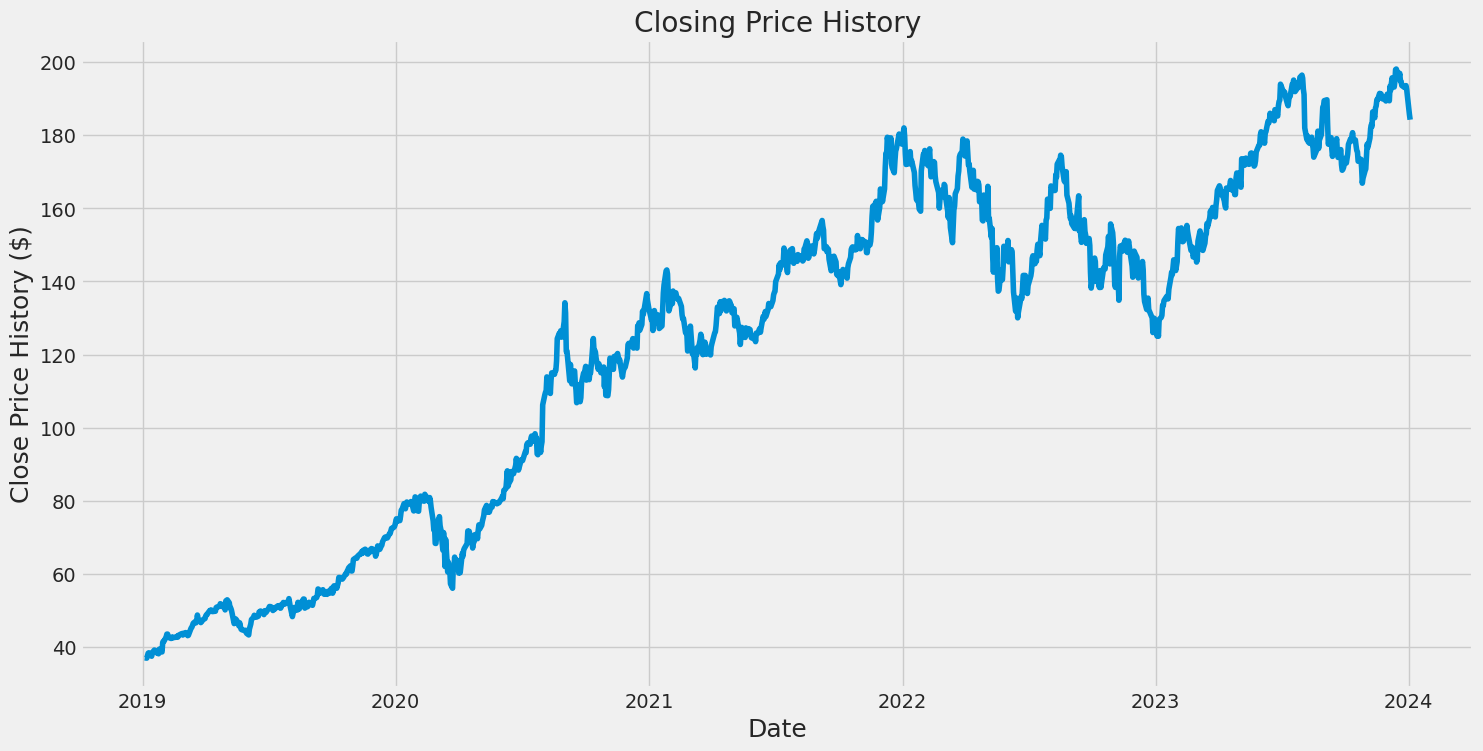

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(AAPL['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price History ($)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only 'Close' column
data = AAPL.filter(['Close'])


# Convert the number of rows to train the model on
dataset = data.values

# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len

1007

In [ ]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[5.12019714e-04],
       [0.00000000e+00],
       [4.37542828e-03],
       ...,
       [9.65369029e-01],
       [9.22607866e-01],
       [9.13981162e-01]])

In [ ]:
# Create the training dataset
# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.00051202, 0.        , 0.00437543, 0.00834743, 0.00910771,
       0.00676483, 0.00321175, 0.00797507, 0.01087649, 0.01230393,
       0.01379345, 0.00833193, 0.00929389, 0.00740098, 0.0152519 ,
       0.01298663, 0.01047307, 0.02687314, 0.02871951, 0.02884364,
       0.03618254, 0.04072861, 0.04082173, 0.03570156, 0.03487923,
       0.03335868, 0.03562397, 0.03452235, 0.03548434, 0.03489473,
       0.03568602, 0.03739276, 0.03588774, 0.03885123, 0.0408062 ,
       0.04096136, 0.0417992 , 0.0391305 , 0.04195437, 0.04331975,
       0.04282324, 0.04125617, 0.03812199, 0.03875814, 0.04805201,
       0.05117067, 0.05241193, 0.05554608, 0.05925432, 0.06220231,
       0.05989047, 0.06241953, 0.07317187, 0.06690355, 0.06331944,
       0.06029387, 0.06290051, 0.0632884 , 0.06519682, 0.06719836])]
[0.07151170796158815]

[array([0.00051202, 0.        , 0.00437543, 0.00834743, 0.00910771,
       0.00676483, 0.00321175, 0.00797507, 0.01087649, 0.01230393,
       0.01379345, 0.00833193, 0.00

In [ ]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(947, 60, 1)

In [ ]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

947/947 [==============================] - 20s 18ms/step - loss: 0.0035


In [ ]:
# Create testing data set
# Create a new array containing scaled values

test_data = scaled_data[training_data_len - 60:, :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [ ]:
# Convert the data to numpy array]

x_test = np.array(x_test)

In [ ]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# Get the models' predicted price value

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

8/8 [==============================] - 1s 10ms/step


In [ ]:
# Get the RMS error

rmse = np.sqrt(np.mean(predictions - y_test)**2)

rmse

1.076330998029367

<ipython-input-65-10dcd2290592>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid ['Predictions'] = predictions


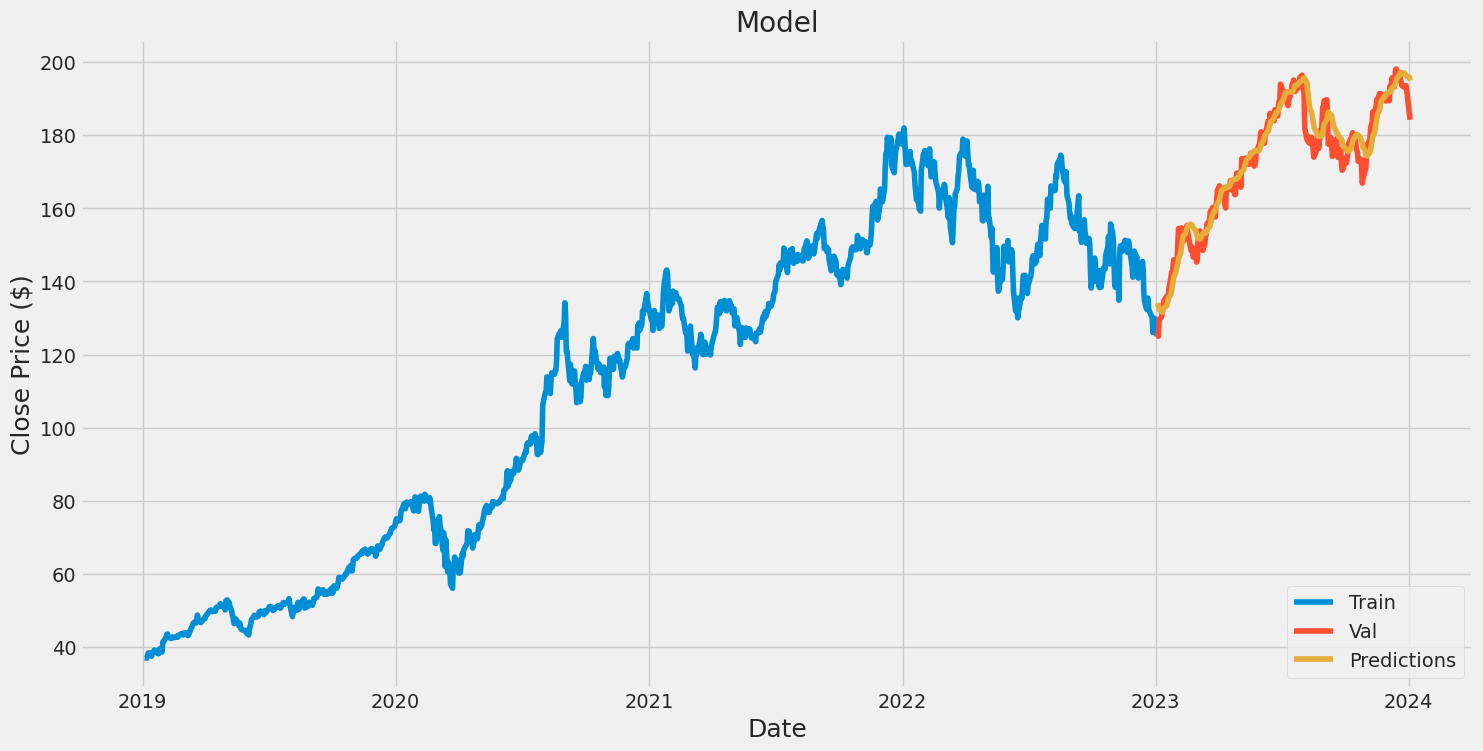

In [ ]:
# Plot the data

train = data[:training_data_len]
valid = data[training_data_len:]
valid ['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the actual and predicted prices.
valid

,Close,Predictions
Date,,
2023-01-04,126.360001,134.153458
2023-01-05,125.019997,133.226334
2023-01-06,129.619995,132.306030
2023-01-09,130.149994,131.827240
2023-01-10,130.729996,131.652496
...,...,...
2023-12-27,193.149994,196.706299
2023-12-28,193.580002,196.394211
2023-12-29,192.529999,196.124634


In [ ]:
# Get the quote
apple_quote = yf.download('AAPL', start, end)

# Create a new dataframe
new_df = apple_quote.filter(['Close'])

last_60_days = new_df[-60:].values

last_60_days_scaled = scaler.transform(last_60_days)

X_test = []

X_test.append(last_60_days_scaled)

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted scaled price

pred_price = model.predict(X_test)

pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

[*********************100%%**********************]  1 of 1 completed
1/1 [==============================] - 0s 17ms/step
[[193.77753]]
